In [2]:
### set up the notebook
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
np.set_printoptions(linewidth=100) 

plt.rcParams.update({'font.size': 14})

In [3]:
def remove_outliers_IQR(data, limit):
    q1 = np.nanpercentile(data, 25)
    q3 = np.nanpercentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - limit * iqr
    upper_bound = q3 + limit * iqr
    # where data is outside bounds, replace with nan
    data_cp = data.copy()
    data_cp[(data_cp < lower_bound) | (data_cp > upper_bound)] = np.nan
    outliers = data[np.isnan(data_cp)]
    
    print('Removed %d / %d points (%.1f percent)' % (len(outliers[~np.isnan(outliers)]), len(data), (len(outliers[~np.isnan(outliers)])/len(data))*100))
    return data_cp

In [13]:
### load the SSH data for paired buoys

buoy_ssh = xr.open_mfdataset('./data/co-deployed_GNSS_buoys.nc')

In [7]:
### calculate the difference for each pair

diff_1 = buoy_ssh.pair_1_ssh_a.values - buoy_ssh.pair_1_ssh_b.values
diff_2 = buoy_ssh.pair_2_ssh_a.values - buoy_ssh.pair_2_ssh_b.values
diff_3 = buoy_ssh.pair_3_ssh_a.values - buoy_ssh.pair_3_ssh_b.values
diff_4 = buoy_ssh.pair_4_ssh_a.values - buoy_ssh.pair_4_ssh_b.values
diff_5 = buoy_ssh.pair_5_ssh_a.values - buoy_ssh.pair_5_ssh_b.values
diff_6 = buoy_ssh.pair_6_ssh_a.values - buoy_ssh.pair_6_ssh_b.values
diff_7 = buoy_ssh.pair_7_ssh_a.values - buoy_ssh.pair_7_ssh_b.values


In [9]:
### remove outliers

diff_1_clean = remove_outliers_IQR(diff_1, 1.5)
diff_2_clean = remove_outliers_IQR(diff_2, 1.5)
diff_3_clean = remove_outliers_IQR(diff_3, 1.5)
diff_4_clean = remove_outliers_IQR(diff_4, 1.5)
diff_5_clean = remove_outliers_IQR(diff_5, 1.5)
diff_6_clean = remove_outliers_IQR(diff_6, 1.5)
diff_7_clean = remove_outliers_IQR(diff_7, 1.5)


Removed 579 / 23973 points (2.4 percent)
Removed 305 / 32040 points (1.0 percent)
Removed 470 / 7575 points (6.2 percent)
Removed 24 / 2715 points (0.9 percent)
Removed 155 / 7065 points (2.2 percent)
Removed 271 / 5695 points (4.8 percent)
Removed 3132 / 45215 points (6.9 percent)


In [10]:
### combine all diffs

all_diffs_clean = np.concatenate([diff_1_clean, 
                                  diff_2_clean, 
                                  diff_3_clean, 
                                  diff_4_clean,
                                  diff_5_clean, 
                                  diff_6_clean, 
                                  diff_7_clean])

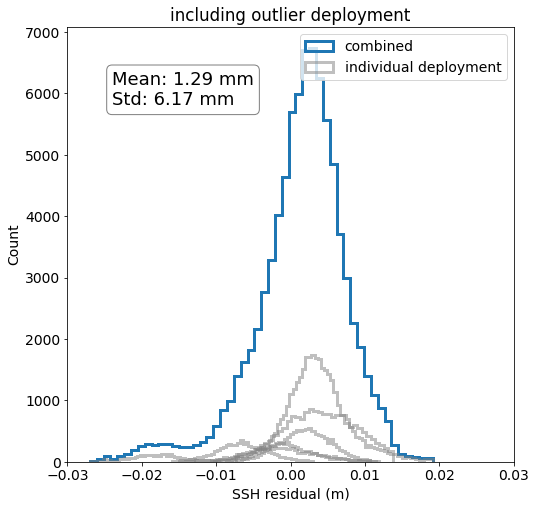

In [11]:
### plot histogram of results

# Calculate the std and mean for the combined data
std_all = np.nanstd(all_diffs_clean)*1000
mean_all = np.nanmean(all_diffs_clean)*1000

fig, ax = plt.subplots(1, figsize=(8,8))
ax.hist(all_diffs_clean, 50, histtype='step', lw=3, label='combined')
ax.hist(diff_1_clean, 50, alpha=0.5, histtype='step', lw=3, label='individual deployment', color='grey')
ax.hist(diff_2_clean, 50, alpha=0.5, histtype='step', lw=3, color='grey')
ax.hist(diff_3_clean, 50, alpha=0.5, histtype='step', lw=3, color='grey')
ax.hist(diff_4_clean, 50, alpha=0.5, histtype='step', lw=3, color='grey')
ax.hist(diff_5_clean, 50, alpha=0.5, histtype='step', lw=3, color='grey')
ax.hist(diff_6_clean, 50, alpha=0.5, histtype='step', lw=3, color='grey')
ax.hist(diff_7_clean, 50, alpha=0.5, histtype='step', lw=3, color='grey')
plt.legend()
ax.set_title('including outlier deployment')
ax.set_ylabel('Count')
ax.set_xlabel('SSH residual (m)')

# Add a text box with the std and mean values
textstr = f'Mean: {mean_all:.2f} mm\nStd: {std_all:.2f} mm'
props = dict(boxstyle='round', facecolor='w', alpha=0.5)
ax.text(0.1, 0.9, textstr, transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props)

ax.set_xlim(-0.03, 0.03)

plt.show()


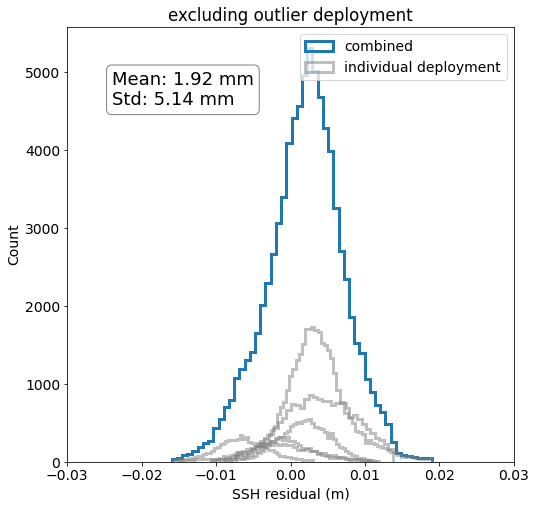

In [12]:
### remove outlier deployment and repeat

all_diffs_clean = np.concatenate([diff_1_clean, 
                                  diff_2_clean, 
                                  diff_3_clean, 
                                  diff_5_clean, 
                                  diff_6_clean, 
                                  diff_7_clean])

### plot histogram of results

# Calculate the std and mean for the combined data
std_all = np.nanstd(all_diffs_clean)*1000
mean_all = np.nanmean(all_diffs_clean)*1000

fig, ax = plt.subplots(1, figsize=(8,8))
ax.hist(all_diffs_clean, 50, histtype='step', lw=3, label='combined')
ax.hist(diff_1_clean, 50, alpha=0.5, histtype='step', lw=3, label='individual deployment', color='grey')
ax.hist(diff_2_clean, 50, alpha=0.5, histtype='step', lw=3, color='grey')
ax.hist(diff_3_clean, 50, alpha=0.5, histtype='step', lw=3, color='grey')
ax.hist(diff_5_clean, 50, alpha=0.5, histtype='step', lw=3, color='grey')
ax.hist(diff_6_clean, 50, alpha=0.5, histtype='step', lw=3, color='grey')
ax.hist(diff_7_clean, 50, alpha=0.5, histtype='step', lw=3, color='grey')
plt.legend()
ax.set_title('excluding outlier deployment')
ax.set_ylabel('Count')
ax.set_xlabel('SSH residual (m)')

# Add a text box with the std and mean values
textstr = f'Mean: {mean_all:.2f} mm\nStd: {std_all:.2f} mm'
props = dict(boxstyle='round', facecolor='w', alpha=0.5)
ax.text(0.1, 0.9, textstr, transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props)

ax.set_xlim(-0.03, 0.03)

plt.show()